In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import re 
import nltk
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [16]:
data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
data.shape

(1000, 2)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [26]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [25]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

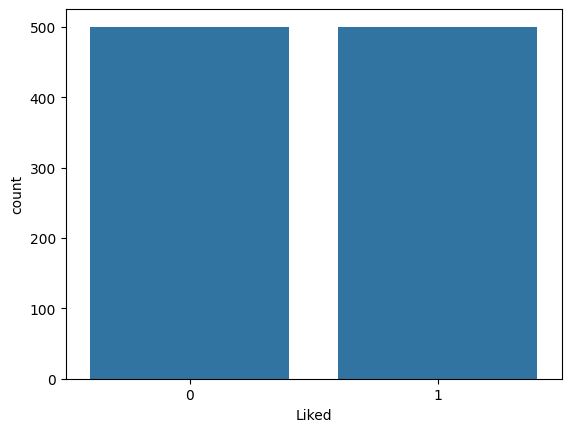

In [22]:
sns.countplot(x='Liked', data=data)

In [23]:
data['Review'][0]

'Wow... Loved this place.'

In [28]:
data['char_count']=data['Review'].apply(len)
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [29]:
data['word_count']=data['Review'].apply(lambda x:len(str(x).split()))
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [31]:
data['sentense_count']=data['Review'].apply(lambda x:len(nltk.sent_tokenize(str(x))))
data.head()

,Review,Liked,char_count,word_count,sentense_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [51]:
review = re.sub("[^a-zA-Z]"," ",data["Review"][0])
review

'Wow    Loved this place '

In [48]:
type(review)

str

In [52]:
review=review.lower()
review

'wow    loved this place '

In [53]:
review=str(review).split()
review

['wow', 'loved', 'this', 'place']

In [54]:
all_stopwords=stopwords.words("english")
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
review=[word for word in review if word not in set(all_stopwords)]
review

['wow', 'loved', 'place']

In [56]:
ps=PorterStemmer()
review=[ps.stem(word) for word in review]
review=" ".join(review)
review

'wow love place'

In [58]:
print(f"""
unprocessed data: {data["Review"][0]}
preprocessed data: {review}
""")


unprocessed data: Wow... Loved this place.
preprocessed data: wow love place



In [59]:
corpus = []
for i in range(len(data)):
    review = re.sub("[^a-zA-Z]"," ",data["Review"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in str(stopwords.words("english"))]
    corpus.append(" ".join(review))

In [60]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid happier',
 'see

In [64]:
data['processed_data']=corpus
data.head()

,Review,Liked,char_count,word_count,sentense_count,processed_data
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust good
2,Not tasty and the texture was just nasty.,0,41,8,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


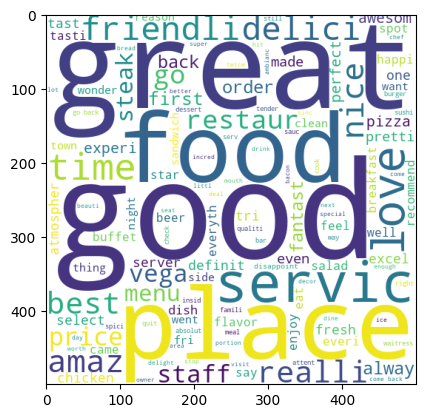

In [71]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')
pos=wc.generate(data[data['Liked']==1]['processed_data'].str.cat(sep=" "))
plt.imshow(pos)


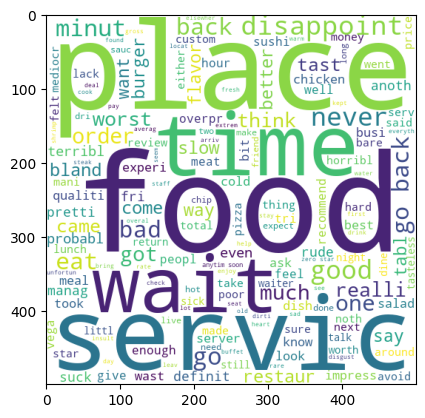

In [70]:
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')
neg=wc.generate(data[data['Liked']==0]['processed_data'].str.cat(sep=" "))
plt.imshow(neg)

In [89]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
X.shape

(1000, 1500)

In [103]:
y = data["Liked"]
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [104]:
y.shape

(1000,)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [122]:
algorithms = {} 
nb_algorithms = [BernoulliNB,GaussianNB,MultinomialNB,XGBClassifier,LogisticRegression,SVC,MLPClassifier]
for algorithm in nb_algorithms:
    model = algorithm().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)

    
    print(f'=> Algorithm: {algorithm.__name__}\nConfusion Matrix:\n\n {cm} \n\nAccuracy Score: {accuracy_score(y_test,y_pred)}\n Classification Report:\n\n{classification_report(y_test,y_pred)}\n{"-"*25}')
    algorithms[algorithm.__name__] = accuracy_score(y_test,y_pred)


=> Algorithm: BernoulliNB
Confusion Matrix:

 [[73 24]
 [21 82]] 

Accuracy Score: 0.775
 Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        97
           1       0.77      0.80      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200

-------------------------
=> Algorithm: GaussianNB
Confusion Matrix:

 [[55 42]
 [12 91]] 

Accuracy Score: 0.73
 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200

-------------------------
=> Algorithm: MultinomialNB
Confusion Matrix:

 [[72 25]
 [21 82]] 


c:\Users\aymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
algorithms

{'BernoulliNB': 0.775,
 'GaussianNB': 0.73,
 'MultinomialNB': 0.77,
 'XGBClassifier': 0.7,
 'LogisticRegression': 0.71,
 'SVC': 0.735,
 'MLPClassifier': 0.745}

In [142]:
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
y_pred=BNB.predict(x_test)
accuracy_score(y_test,y_pred)

0.775

In [150]:
# Définissez les valeurs d'alpha que vous souhaitez tester
alphas = [0.1,0.3,0.2,0.4, 0.5,0.6,0.7,0.8,0.9,1.0,3.0,4.0,6.0,8.0, 2.0, 5.0, 10.0]

# Créez un dictionnaire des hyperparamètres que vous souhaitez ajuster
param_grid = {'alpha': alphas}


# Utilisez GridSearchCV pour rechercher la meilleure combinaison d'hyperparamètres
grid_search = GridSearchCV(BNB, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Affichez les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Obtenez le modèle avec les meilleurs hyperparamètres
best_bernoulli_nb = grid_search.best_estimator_

# Faites des prédictions sur l'ensemble de test
y_pred = best_bernoulli_nb.predict(x_test)

# Évaluez la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

Meilleurs hyperparamètres : {'alpha': 0.4}
Précision du modèle : 0.785


In [155]:
param_grid_nb = {
    'var_smoothing': np.logspace(-3, 3, num=7)

}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")

Fitting 10 folds for each of 7 candidates, totalling 70 fits
GaussianNB(var_smoothing=0.1)
Précision du modèle : 0.785


In [156]:
import joblib 
joblib.dump(nbModel_grid, 'meilleur_modele.pkl')

['meilleur_modele.pkl']

In [157]:
loaded_model = joblib.load('meilleur_modele.pkl')
predictions = loaded_model.predict('pizza is not good')

ValueError: Expected 2D array, got scalar array instead:
array=pizza is not good.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.